<a href="https://colab.research.google.com/github/jdblackstar/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/123A_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
# First of all, our handy dandy imports

import numpy as np
import matplotlib as plt
from scipy import stats

In [0]:
# PART 1:

# defining our function
def prob_drunk_given_pos(prob_drunk_prior, false_pos_rate, true_pos_rate):
  prob_drunk_post = (true_pos_rate * prob_drunk_prior) / ((true_pos_rate * prob_drunk_prior) 
  + (false_pos_rate * (1 - prob_drunk_prior)))
  return prob_drunk_post

In [19]:
# What is the probability  that a person is drunk after one positive breathalyzer test?

print("Probability a person is drunk after one test: \n", prob_drunk_given_pos(1/1000, .08, 1))

Probability a person is drunk after one test: 
 0.012357884330202669


In [20]:
# Run the test again, using the previous return as a parameter for the new test

result1 = prob_drunk_given_pos(1/1000, .08, 1)
result2 = prob_drunk_given_pos(result1, .08, 1)
print("Probability a person is drunk after two tests: \n", result2)


Probability a person is drunk after two tests: 
 0.13525210993291495


In [21]:
result3 = prob_drunk_given_pos(result2, .08, 1)
print("Probability a person is drunk after three tests: \n", result3)

Probability a person is drunk after three tests: 
 0.6615996951348605


In [22]:
result4 = prob_drunk_given_pos(result3, .08, 1)
print("Probability a person is drunk after four tests: \n", result4, "\n")

# Looks like it takes 4 tests to have a confidence level above 95%

Probability a person is drunk after four tests: 
 0.9606895076105054 



In [0]:
# PART 2:

In [0]:
?stats.bayes_mvs

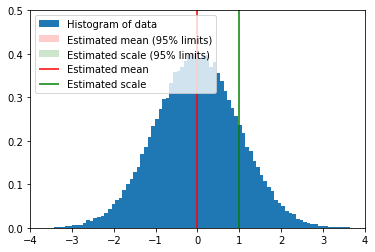

In [24]:
# Example copy pasta'd from the above function's docstring

n_samples = 100000
data = stats.norm.rvs(size=n_samples)
res_mean, res_var, res_std = stats.bayes_mvs(data, alpha=0.95)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(data, bins=100, density=True, label='Histogram of data')
ax.vlines(res_mean.statistic, 0, 0.5, colors='r', label='Estimated mean')
ax.axvspan(res_mean.minmax[0],res_mean.minmax[1], facecolor='r',
            alpha=0.2, label=r'Estimated mean (95% limits)')
ax.vlines(res_std.statistic, 0, 0.5, colors='g', label='Estimated scale')
ax.axvspan(res_std.minmax[0],res_std.minmax[1], facecolor='g', alpha=0.2,
           label=r'Estimated scale (95% limits)')

ax.legend(fontsize=10)
ax.set_xlim([-4, 4])
ax.set_ylim([0, 0.5])
plt.show()

In [0]:
import pandas as pd

In [26]:
# Gonna snag the voting data I've already used a couple times since I'm familiar with it

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-03-19 17:56:28--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2020-03-19 17:56:29 (286 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [28]:
df = pd.read_csv('house-votes-84.data', names=['party','h-infants','water-proj',
                          'budget','phys-freeze', 'salvador-aid',
                          'rel-in-schools','anti-sat-test',
                          'nic-contras','mx-missile','immigration',
                          'synfuels-cut', 'edu-spend', 'sue-perfund','crime','d-free',
                          'export-sa'])
print(df.shape)
df.head()

(435, 17)


,party,h-infants,water-proj,budget,phys-freeze,salvador-aid,rel-in-schools,anti-sat-test,nic-contras,mx-missile,immigration,synfuels-cut,edu-spend,sue-perfund,crime,d-free,export-sa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
# Out with the letters, in with the numbers

df = df.replace({'y': 1, 'n': 0, '?': np.NaN})

In [0]:
rep = df[df['party'] == 'republican']
dem = df[df['party'] == 'democrat']

In [0]:
df = df.dropna()

In [0]:
rep = df[df['party'] == 'republican']
dem = df[df['party'] == 'democrat']

In [33]:
rep.shape

(108, 17)

In [34]:
dem.shape
dem['budget']

5      1.0
19     1.0
23     1.0
25     1.0
26     1.0
      ... 
421    1.0
422    1.0
423    1.0
426    1.0
431    1.0
Name: budget, Length: 124, dtype: float64

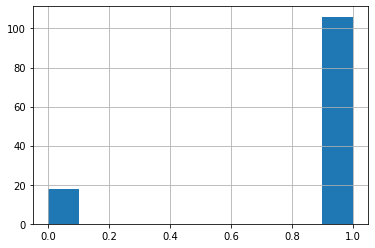

In [35]:
dem['budget'].hist();

In [0]:
# I'm not a huge fan of this layout for this kind of graph, but it works
# Would be nice to eliminate 0.2, 0.4, 0.6, 0.8

In [36]:
dem['budget'].mean()

0.8548387096774194

In [0]:
def confidence_interval(data, confidence=.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (lower bound, mean, upper bound)
  """
  # turn data into array
  data = np.array(data)
  # finds mean 
  mean = np.mean(data)
  n = len(data)
  std_err = stats.sem(data)
  dof = n - 1
  interval = std_err * stats.t.ppf((1 + confidence)/ 2.0, dof)
  return (mean - interval, mean, mean + interval)

In [0]:
bayes_mean, bayes_var, bayes_std = stats.bayes_mvs(dem['budget'], alpha=.95)

In [55]:
bayes_mean

Mean(statistic=0.8548387096774194, minmax=(0.791966749899413, 0.9177106694554258))

In [0]:
# Exploration below:

In [60]:
type(bayes_mean)

scipy.stats.morestats.Mean

In [58]:
# Can I index?
bayes_mean[0]

0.8548387096774194

In [62]:
# Can I index the list with a list?
bayes_mean[1][1]

0.9177106694554258

In [0]:
ci = confidence_interval(dem['budget'])

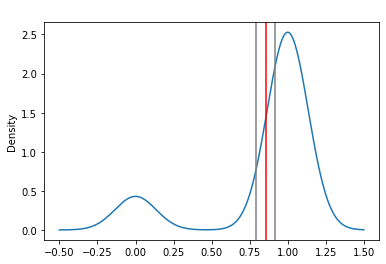

In [63]:
# Graph from yesterday's assig
dem['budget'].plot.density()
plt.title("Democratic Budget Support", color='w')
plt.axvline(ci[0], color='red')
plt.axvline(ci[1], color='grey')
plt.axvline(ci[2], color='grey')

plt.show;

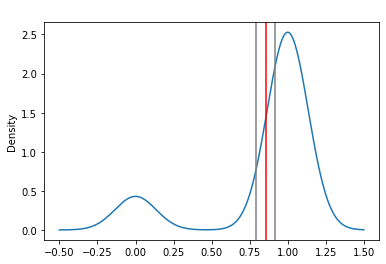

In [64]:
# Graph using stats.bayes_mvs
dem['budget'].plot.density()
plt.title("Democratic Budget Support", color='w')
plt.axvline(bayes_mean[0], color='red')
plt.axvline(bayes_mean[1][0], color='grey')
plt.axvline(bayes_mean[1][1], color='grey')

plt.show;

In [67]:
print('Frequentist: \n', "lower:", ci[0],'upper:', 
                                                    ci[1], ci[2])
print('Bayesian: \n', "lower:", bayes_mean[0],'upper:', 
                                          bayes_mean[1][0], bayes_mean[1][1])

Frequentist: 
 lower: 0.8548387096774194 upper: 0.791966749899413 0.9177106694554258
Bayesian: 
 lower: 0.8548387096774194 upper: 0.791966749899413 0.9177106694554258


## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!